In [1]:
import pandas as pd
import os

import torch

In [5]:
os.getcwd()

'/usr/itetnas04/data-scratch-01/sdauncey/data/VScodeProjects/bitter-lesson-tokenization'

In [8]:
losses = pd.read_csv("train_losses_exp3.csv")

In [9]:
losses.head()

,ar_loss,gating_loss,true_downsample_rate,rate_consistency_loss,total_loss,selected_action_ce
0,7.606655,-0.017917,0.534334,0.161692,7.750429,0.625442
1,5.774187,0.100500,0.322947,0.010643,5.885330,0.572168
2,4.963949,-0.003053,0.224022,0.001350,4.962246,0.483279
3,4.473749,-0.052337,0.178551,0.010210,4.431622,0.421599
4,4.161334,0.039349,0.163977,0.014800,4.215483,0.405929


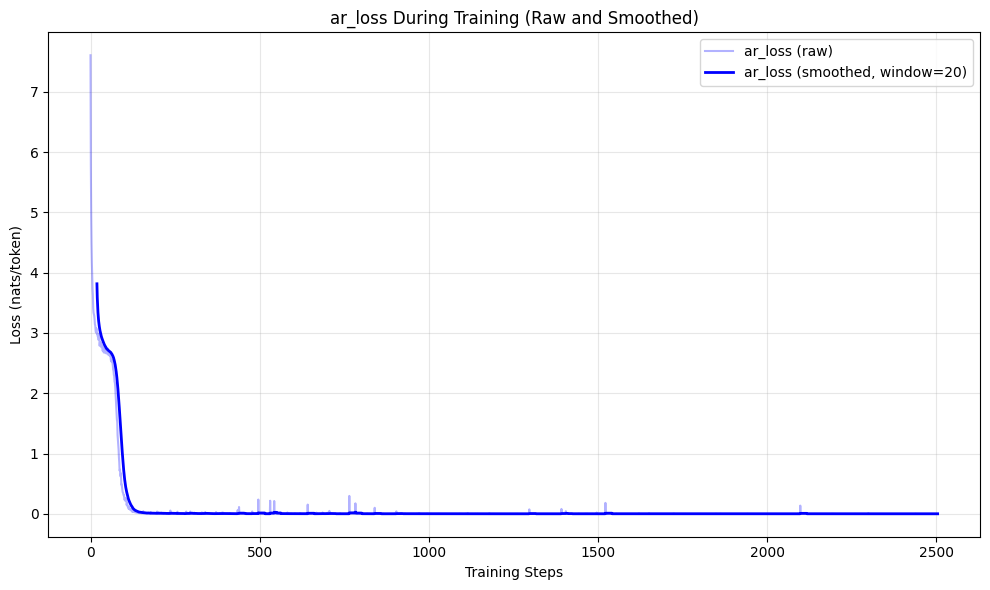

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_train_losses(column_name):
    # Add a smoothed version of the loss curve
    window_size = 20
    smoothed_ar_loss = losses[column_name].rolling(window=window_size).mean()

    plt.figure(figsize=(10, 6))
    plt.plot(losses[column_name], alpha=0.3, color='blue', label=f'{column_name} (raw)')
    plt.plot(smoothed_ar_loss, linewidth=2, color='blue', label=f'{column_name} (smoothed, window={window_size})')
    plt.xlabel('Training Steps')
    plt.ylabel('Loss (nats/token)')
    plt.title(f'{column_name} During Training (Raw and Smoothed)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_train_losses("ar_loss")

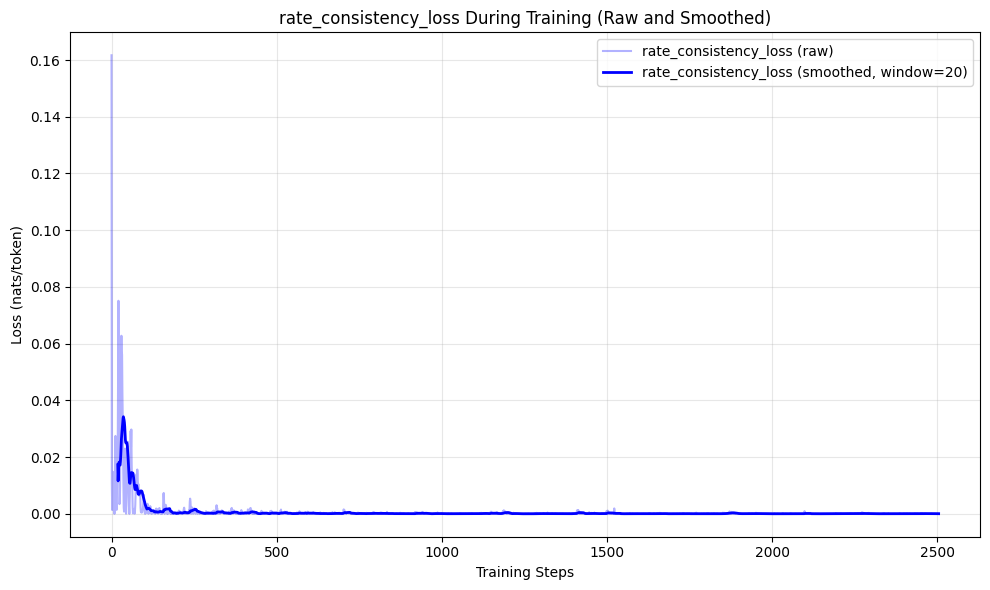

In [11]:
plot_train_losses("rate_consistency_loss")

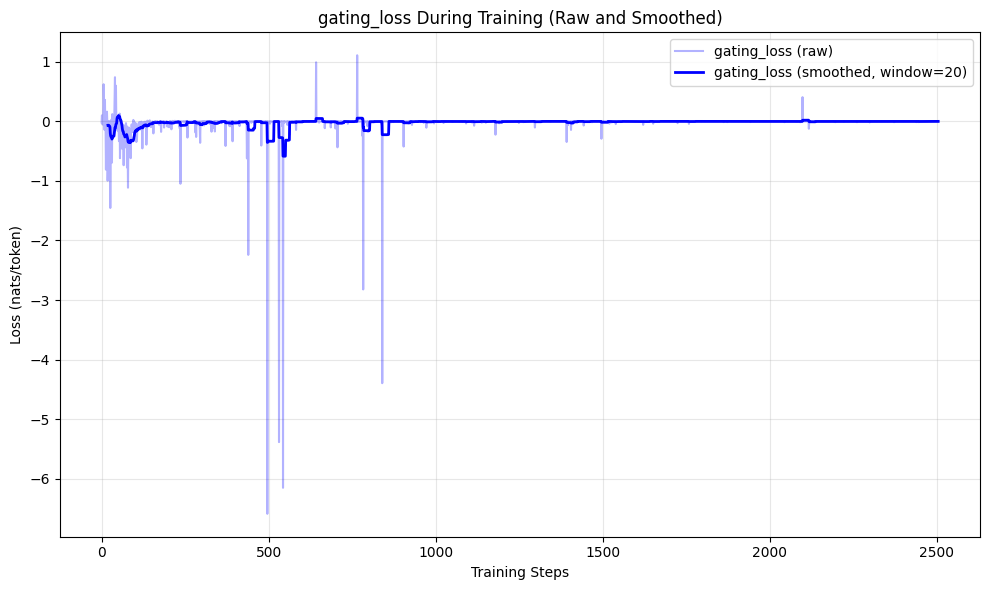

In [12]:
plot_train_losses("gating_loss")

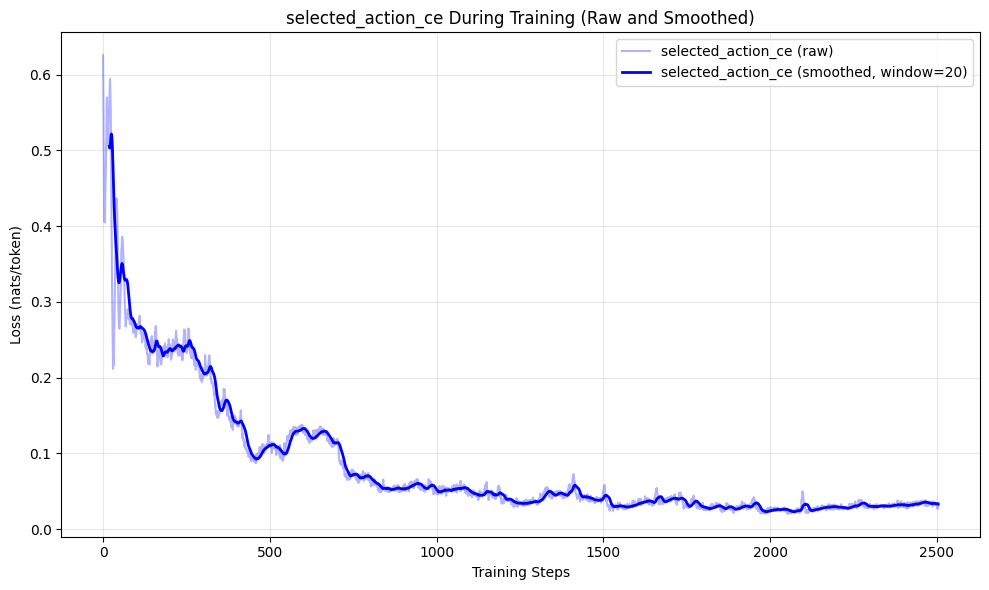

In [13]:
plot_train_losses("selected_action_ce")

In [16]:

model_file_name = "bitter-llm-exp3.pt"
net_scratch_dir = os.path.join("/itet-stor/sdauncey/net_scratch/VScodeProjects/bitter-lesson-tokenization")

os.getcwd()

'/usr/itetnas04/data-scratch-01/sdauncey/data/VScodeProjects/bitter-lesson-tokenization'

In [2]:
from experiment_3 import *

In [17]:
my_model = torch.load(os.path.join(net_scratch_dir, model_file_name))


/itet-stor/sdauncey/net_scratch/tmp/ipykernel_2543583/2066348989.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  my_model = torch.load(os.path.join(net_scratch_dir, mode

In [18]:
my_model

GemmaMiniBitterLLM(
  (embedding): Embedding(256, 256)
  (down_layers): ModuleList(
    (0-1): 2 x Gemma2DecoderLayer(
      (self_attn): Gemma2Attention(
        (q_proj): Linear(in_features=256, out_features=256, bias=False)
        (k_proj): Linear(in_features=256, out_features=256, bias=False)
        (v_proj): Linear(in_features=256, out_features=256, bias=False)
        (o_proj): Linear(in_features=256, out_features=256, bias=False)
        (rotary_emb): Gemma2RotaryEmbedding()
      )
      (mlp): Gemma2MLP(
        (gate_proj): Linear(in_features=256, out_features=256, bias=False)
        (up_proj): Linear(in_features=256, out_features=256, bias=False)
        (down_proj): Linear(in_features=256, out_features=256, bias=False)
        (act_fn): PytorchGELUTanh()
      )
      (input_layernorm): Gemma2RMSNorm((256,), eps=1e-06)
      (pre_feedforward_layernorm): Gemma2RMSNorm((256,), eps=1e-06)
      (post_feedforward_layernorm): Gemma2RMSNorm((256,), eps=1e-06)
      (post_atten

In [195]:
my_model.down_layers[0].self_attn.is_causal

True

In [196]:
my_seq = torch.zeros(1, 100, dtype=torch.long).to(device)

In [197]:
my_model(my_seq)["logits"][0, 39, :10]

tensor([-1.2373e-04, -1.3738e+01, -1.5370e+01, -2.0430e+01, -1.5682e+01,
        -1.8735e+01, -1.7794e+01, -1.8517e+01, -1.7652e+01, -1.6191e+01],
       device='cuda:0', grad_fn=<SliceBackward0>)

In [198]:
seq_edited = my_seq.clone()
seq_edited[0, 40] = 10
my_model(seq_edited)["logits"][0, 39, :10]

tensor([-1.5377e-04, -1.3318e+01, -1.5099e+01, -2.0206e+01, -1.5506e+01,
        -1.8637e+01, -1.7576e+01, -1.8402e+01, -1.7503e+01, -1.6015e+01],
       device='cuda:0', grad_fn=<SliceBackward0>)

In [199]:
byte5_tokenizer = AutoTokenizer.from_pretrained("google/byt5-large")

In [200]:
import os

username = "sdauncey"
scratch_dir = f"/scratch/{username}/tokenizer_training"

if not os.path.exists(scratch_dir):
    os.makedirs(scratch_dir)

# Download a portion of OpenWebText dataset
# This will download a subset of the OpenWebText corpus
print("Downloading OpenWebText dataset...")

# Load a small portion of OpenWebText (1% of the dataset)
openwebtext_8k = datasets.load_dataset(
    "openwebtext",
    split="train[:1%]",  # Using only 1% samples of the dataset for now.
    cache_dir=os.path.join(scratch_dir, "openwebtext_8k_cache"),
    trust_remote_code=True
)

print(f"Downloaded {len(openwebtext_8k)} examples from OpenWebText")

Downloaded 80138 examples from OpenWebText


In [232]:
test_string = "The model seems to be not autoregressive"# openwebtext_8k[-1]["text"]
test_batch = byte5_tokenizer.encode(test_string, return_tensors="pt", padding=True).to(device)
test_batch.shape

torch.Size([1, 41])

In [233]:
from experiment_1 import MiniBitterLLM

In [234]:
out = my_model(test_batch)

In [235]:
logits = out["logits"]

In [236]:
logits.shape

torch.Size([1, 41, 256])

In [237]:
log_probs = logits.exp()

In [238]:
most_likely_tokens_probs = log_probs.max(dim=-1)
most_likely_tokens_probs

torch.return_types.max(
values=tensor([[0.9999, 1.0000, 1.0000, 1.0000, 1.0000, 0.9999, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 0.9999, 1.0000, 1.0000, 1.0000, 1.0000, 0.9998,
         1.0000, 1.0000, 1.0000, 1.0000, 0.9997, 0.9999, 1.0000, 1.0000, 1.0000,
         1.0000, 0.9999, 1.0000, 0.6667, 0.6750]], device='cuda:0',
       grad_fn=<MaxBackward0>),
indices=tensor([[107, 104,  35, 112, 114, 103, 104, 111,  35, 118, 104, 104, 112, 118,
          35, 119, 114,  35, 101, 104,  35, 113, 114, 119,  35, 100, 120, 119,
         114, 117, 104, 106, 117, 104, 118, 118, 108, 121, 104,   1,   1]],
       device='cuda:0'))

In [242]:
out["down_merge_dst"]

tensor([[0, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 6, 6, 6, 6, 7, 8, 8]], device='cuda:0')

In [243]:
out["up_merge_dst"]

tensor([[0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 3, 3, 4, 5, 5, 5, 5, 6, 7, 7, 7]], device='cuda:0')

In [246]:
out["down_gate_samples"]

tensor([[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0]], device='cuda:0')

In [244]:
most_likely_tokens = log_probs.argmax(dim=-1)
byte5_tokenizer.decode(most_likely_tokens[0, :])

'he model seems to be not autoregressive</s></s>'

In [245]:
most_likely_tokens[0]

tensor([107, 104,  35, 112, 114, 103, 104, 111,  35, 118, 104, 104, 112, 118,
         35, 119, 114,  35, 101, 104,  35, 113, 114, 119,  35, 100, 120, 119,
        114, 117, 104, 106, 117, 104, 118, 118, 108, 121, 104,   1,   1],
       device='cuda:0')

In [180]:
byte5_tokenizer.decode([136, 136])

''

In [15]:
old_model = torch.load("bitter-llm-v2.pt")
old_model, f"{parameter_count_string(old_model)} parameters"

/itet-stor/sdauncey/net_scratch/tmp/ipykernel_2543583/794469471.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  old_model = torch.load("bitter-llm-v2.pt")


AttributeError: Can't get attribute 'MiniBitterLLM' on <module '__main__'>

In [ ]:
my_model = torch.load(os.path.join(net_scratch_dir, model_file_name))

In [47]:
out = my_model(test_batch)

In [ ]:
out["down_gate_samples"].shape

In [ ]:
display_gating(test_batch[0], out["down_merge_dst"][0])

In [62]:

def display_gating(tokens_ids, merge_dst):
    """Display how a SmallBitterLLM merges a sequence. token_ids and merge_dst are tensors of shape (sequence_length,)."""
    previous_merge_dst = 0
    for t_id, merge_destinantion in zip(tokens_ids, merge_dst):
        merge_destinantion = merge_destinantion.item()
        
        if merge_destinantion != previous_merge_dst:
            print(f"|", end="")
            previous_merge_dst = merge_destinantion
        
        t_txt = byte5_tokenizer.decode(t_id)
        print(f"{t_txt.replace('\n', '\\n')}", end="")

    print()

In [ ]:
# Get the frequency of the 20 most common tokens in test_batch
from collections import Counter
import matplotlib.pyplot as plt

# Convert tensor to list and count frequencies
token_list = test_batch[0].cpu().numpy().tolist()
token_counter = Counter(token_list)

# Get the 20 most common tokens
most_common_tokens = token_counter.most_common(20)

# Print the results
print("20 most common tokens in test_batch:")
for token, count in most_common_tokens:
    print(f"Token {token}: {count} occurrences")

# Visualize the results
tokens, counts = zip(*most_common_tokens)
plt.figure(figsize=(12, 6))
plt.bar(range(len(tokens)), counts)
plt.xticks(range(len(tokens)), [byte5_tokenizer.decode([t]) for t in tokens], rotation=45)
plt.xlabel('Token ID')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Tokens')
plt.tight_layout()
plt.show()


In [ ]:
gated_tokens = test_batch[0][out["down_gate_samples"][0] == 1]
byte5_tokenizer.decode(gated_tokens)

In [ ]:
len()/sum(out["down_gate_samples"][0]).item()

In [40]:
from transformers import AutoProcessor

In [ ]:
processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-Omni-7B")
processor.encode(test_string, return_tensors="pt", padding=True).shape


In [ ]:
for t in processor.encode(test_string, return_tensors="pt", padding=True)[0]:
    print(processor.decode([t]), end="|")


In [192]:
def create_gemma2DecoderLayer(config: Gemma2Config, layer_idx: int):
    # Gemma2Attention.__init__ overrides config.sliding_window with None if layer_idx % 2 == 0.
    # This is a hack to get the sliding window for even layers indices.
    layer = Gemma2DecoderLayer(config, layer_idx)
    layer.self_attn.sliding_window = config.sliding_window
    return layer


class CausalGemmaMiniBitterLLM(nn.Module):
    # A mini BitterLLM with 2 down, 4 mid, and 2 up layers. As a vibe check on the idea.
    # Use Gemma2DecoderLayer as a drop in replacement for the TransformerEncoderLayer, with RoPE and sliding window pre-implemented.
    # Also uses a causal mask.
    def __init__(self, vocab_size: int, embedding_dim: int, num_heads: int, downsample_rate: float = 0.25, sliding_window = 64, GaterClass=LinearGater):
        super().__init__()
        self.embedding_dim = embedding_dim
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        head_dim = embedding_dim // num_heads

        byte_layer_config = Gemma2Config(
            head_dim=head_dim,
            query_pre_attn_scalar=head_dim, 
            sliding_window=sliding_window,
            intermediate_size=embedding_dim,
            hidden_size=embedding_dim,
            num_attention_heads=num_heads,
            num_key_value_heads=num_heads,
        )

        deep_layer_config = Gemma2Config(
            head_dim=head_dim,
            query_pre_attn_scalar=head_dim, 
            sliding_window=None,
            intermediate_size=embedding_dim * 4, # dim_feedforward should scale inversely with the number of tokens in the sequence.
            hidden_size=embedding_dim,
            num_attention_heads=num_heads,
            num_key_value_heads=num_heads
        )

        n_down_layers = 2
        n_mid_layers = 2
        n_up_layers = 2

        # Layer idx=0 is necessary for the sliding window to be applied.
        self.down_layers = nn.ModuleList([
            create_gemma2DecoderLayer(byte_layer_config, layer_idx=i) for i in range(n_down_layers)
        ])

        self.mid_layers = nn.ModuleList([
            create_gemma2DecoderLayer(deep_layer_config, layer_idx=i+n_down_layers) for i in range(n_mid_layers) 
        ])

        self.up_layers = nn.ModuleList([
            create_gemma2DecoderLayer(byte_layer_config, layer_idx=i+n_down_layers+n_mid_layers) for i in range(n_up_layers)
        ])

        self.output_layer = nn.Linear(embedding_dim, vocab_size)
        
        self.down_layer_gate = GaterClass(embedding_dim, downsample_rate)
        self.downsample_rate = downsample_rate


    def forward(
            self, 
            input_ids: torch.Tensor, 
            position_ids: torch.Tensor=None, 
            past_key_values: torch.Tensor=None,
            use_cache: bool=None,
            cache_position: torch.Tensor=None
        ) -> torch.Tensor:

        batch_size, max_seq_len = x.shape

        x = self.embedding(x)

        if position_ids is None:
            position_ids = torch.arange(max_seq_len, dtype=x.dtype).unsqueeze(0).expand(batch_size, -1).to(x.device)      

        # Apply down layers to byte tokens        
        for layer in self.down_layers:
            x = layer(x, position_ids=position_ids)[0]

        # Sample gating binary variables for each token.
        down_gate_logits, down_gate_probs = self.down_layer_gate(x)
        down_gate_samples = torch.bernoulli(down_gate_probs)

        # Hack: ensure for now that we always gate on the first token:
        down_gate_samples[:, 0] = 1.

        # Merge the tokens into the next token where the gate is 1.
        down_gate_samples = down_gate_samples.squeeze(-1)
        down_merge_dst, n_dst = get_merge_dst(down_gate_samples)

        # Also merge the position ids.
        position_ids_downsampled = torch.zeros(batch_size, n_dst.max(), dtype=x.dtype).to(x.device)
        position_ids_downsampled = torch.scatter_reduce(position_ids_downsampled, dim=1, index=down_merge_dst, src=position_ids, reduce="mean", include_self=False)

        # Merge the downsampled tokens.
        down_merge_dst = down_merge_dst.unsqueeze(-1).expand(-1, -1, self.embedding_dim)

        x_downsampled = torch.zeros(batch_size, n_dst.max(), self.embedding_dim, dtype=x.dtype).to(x.device)
        x_downsampled = torch.scatter_reduce(x_downsampled, dim=1, index=down_merge_dst, src=x, reduce="mean", include_self=False)

        # Apply mid layers to merged tokens and compute the deviation
        for layer in self.mid_layers:
            y_downsampled = layer(x_downsampled, position_ids=position_ids_downsampled)[0]
            deviation = y_downsampled - x_downsampled        

        # Upsample by removing the first token merge group, shifting all token groups down and adding another one token group at the end.
        up_gate_samples = down_gate_samples[:, 1:]
        up_gate_samples = torch.cat([up_gate_samples, torch.ones(batch_size, 1, dtype=up_gate_samples.dtype).to(up_gate_samples.device)], dim=1)
        up_merge_dst, _ = get_merge_dst(up_gate_samples)
        up_merge_dst = up_merge_dst.unsqueeze(-1).expand(-1, -1, self.embedding_dim)

        # Add the upsampled deviation to the input to the middle layers
        upsampled_deviation = torch.gather(deviation, dim=1, index=up_merge_dst)
        y = x + upsampled_deviation

        # Apply up layers to byte tokens
        for layer in self.up_layers:
            y = layer(y, position_ids=position_ids)[0]

        # Map residual stream to logits
        logits = self.output_layer(y)
        logits = F.log_softmax(logits, dim=-1)

        out = {
            "logits": logits,
            "down_gate_probs": down_gate_probs.squeeze(-1),
            "down_gate_logits": down_gate_logits.squeeze(-1),
            "down_gate_samples": down_gate_samples.to(dtype=torch.long),
            "down_merge_dst": down_merge_dst[:, :, 0], # This dimension is repeated.
            "up_merge_dst": up_merge_dst[:, :, 0],
            "n_dst": n_dst,
            "position_ids": position_ids,
            "key_values": None
        }

        return out

In [4]:
Gemma2Config()._attn_implementation

'eager'

In [57]:

head_dim = 16
embedding_dim = 128
num_heads = 8
sliding_window = 3

cfg = Gemma2Config(
    head_dim=head_dim,
    query_pre_attn_scalar=head_dim, 
    sliding_window=sliding_window,
    intermediate_size=embedding_dim,
    hidden_size=embedding_dim,
    num_attention_heads=num_heads,
    num_key_value_heads=num_heads,
)
cfg

Gemma2Config {
  "attention_bias": false,
  "attention_dropout": 0.0,
  "attn_logit_softcapping": 50.0,
  "bos_token_id": 2,
  "cache_implementation": "hybrid",
  "eos_token_id": 1,
  "final_logit_softcapping": 30.0,
  "head_dim": 16,
  "hidden_activation": "gelu_pytorch_tanh",
  "hidden_size": 128,
  "initializer_range": 0.02,
  "intermediate_size": 128,
  "max_position_embeddings": 8192,
  "model_type": "gemma2",
  "num_attention_heads": 8,
  "num_hidden_layers": 28,
  "num_key_value_heads": 8,
  "pad_token_id": 0,
  "query_pre_attn_scalar": 16,
  "rms_norm_eps": 1e-06,
  "rope_theta": 10000.0,
  "sliding_window": 3,
  "transformers_version": "4.46.2",
  "use_cache": true,
  "vocab_size": 256000
}

In [206]:
my_layer = create_gemma2DecoderLayer(cfg, 0).to(device)

In [207]:
batch_size = 2
seq_len = 10
my_x =  torch.randn(batch_size, seq_len, embedding_dim, requires_grad=True).to(device)
my_x.retain_grad()

my_cache_position = torch.arange(seq_len, dtype=torch.long, device=my_x.device)

my_attention_mask = Gemma2Model._prepare_4d_causal_attention_mask_with_cache_position(
    None,
    seq_len,
    seq_len,
    my_x.dtype,
    my_x.device,
    cache_position,
    batch_size=batch_size,
)

# Test: can we use non-integer position ids?
my_position_ids = torch.arange(seq_len).unsqueeze(0).expand(batch_size, -1).to(device) * 2 + 0.5

my_past_kv = HybridCache(
    cfg,
    batch_size=batch_size,
    max_cache_len=seq_len,
    device=my_x.device,
    dtype=my_x.dtype,
)



In [210]:
my_y, = my_layer(
    my_x, 
    attention_mask=my_attention_mask,
    position_ids=my_position_ids, 
    past_key_value=my_past_kv,
    cache_position=my_cache_position,
)

In [212]:
weird_loss = (my_y[:, 5, :] ** 2).sum()

weird_loss.backward()
my_x.grad

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0')

In [213]:
my_x.grad.norm(dim=-1)

tensor([[ 0.0000,  0.0000,  0.0000, 28.4789, 21.0459, 58.8362,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000, 35.3375, 31.0560, 66.5331,  0.0000,  0.0000,
          0.0000,  0.0000]], device='cuda:0')